Valentin Moreno Vasquez

Metodos de optimización y razonamiento aproximado

Universidad EIA 

18/08/2025 

# **Contexto del Problema y Análisis del Dataset**

El problema consiste en desarrollar un sistema de optimización para mezclas de vinos que permita crear productos comerciales consistentes a partir de un amplio conjunto de vinos base.  

Utilizaremos el dataset **Wine Quality** (variante roja) de la **UCI**, que contiene **1,599 muestras** con **11 atributos fisicoquímicos** y una **evaluación de calidad** (escala 0-10).


# **Importe de librerias**

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler
from deap import base, creator, tools
from sklearn.metrics import mean_squared_error

In [47]:
#Lectura del dataset
data = pd.read_csv('winequality-red.csv')
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# **Busqueda de Features mas relevantes**

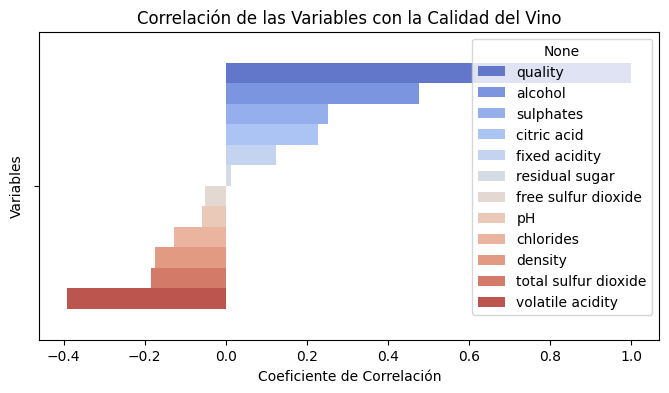

In [49]:
# Correlacion de Pearson
# Calcular correlación solo con la variable 'quality'
corr_with_quality = data.corr()["quality"].sort_values(ascending=False)

# Mostrar las correlaciones
plt.figure(figsize=(8,4))
sns.barplot(x=corr_with_quality, hue=corr_with_quality.index, palette='coolwarm')
plt.title('Correlación de las Variables con la Calidad del Vino')
plt.xlabel('Coeficiente de Correlación')
plt.ylabel('Variables')
plt.show()

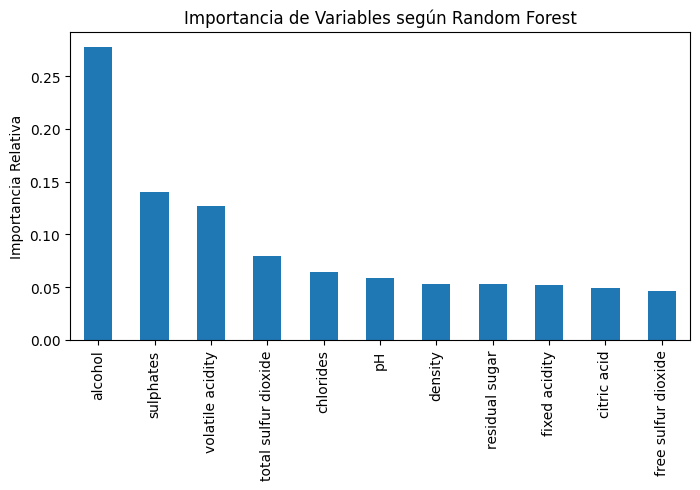

In [50]:
# Análisis de importancia con Random Forest
X = data.drop('quality', axis=1)
y = data['quality']

modelrf = RandomForestRegressor(n_estimators=100, random_state=42)
modelrf.fit(X, y)

feature_importances = pd.Series(modelrf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8,4))
feature_importances.plot(kind='bar')
plt.title('Importancia de Variables según Random Forest')
plt.ylabel('Importancia Relativa')
plt.show()

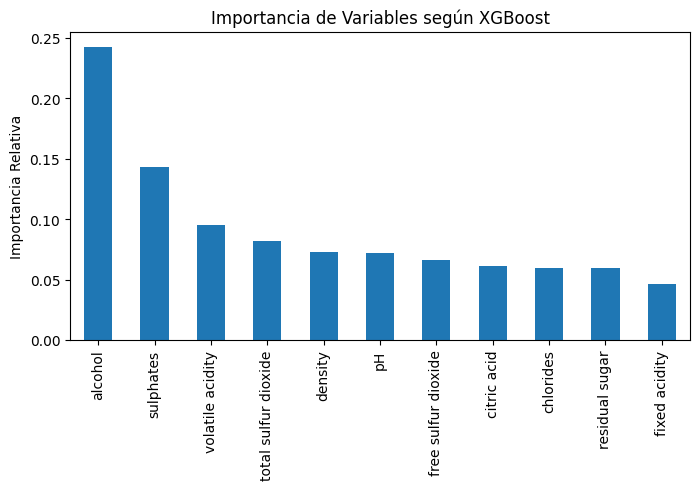

In [51]:
# Análisis de importancia con XGBoost
# Definir y entrenar el modelo XGBoost
modelxgb = XGBRegressor(
    n_estimators=300,        # número de árboles (puedes ajustar)
    learning_rate=0.05,      # tasa de aprendizaje
    max_depth=6,             # profundidad máxima de los árboles
    subsample=0.8,           # fracción de datos usados por árbol
    colsample_bytree=0.8,    # fracción de features usados por árbol
    random_state=42
)

modelxgb.fit(X, y)

# Obtener importancia de características
feature_importances = pd.Series(modelxgb.feature_importances_, index=X.columns).sort_values(ascending=False)

# Visualización
plt.figure(figsize=(8,4))
feature_importances.plot(kind='bar')
plt.title('Importancia de Variables según XGBoost')
plt.ylabel('Importancia Relativa')
plt.show()

# Conclusión
El alcohol, los sulfatos y la acidez volatile son las caracteristicas que mas influyen en la percepcion de la calidad del vino segun este dataset 

lo cual se comprueba a traves de varios metodos dandonos un panorama un poco mas amplio de lo que mas importa a la hora de valorar un vino.

---

# **¿Qué sucedería si definiera conjuntos difusos y reglas?**

Si se definieran **conjuntos difusos** (ejemplo: *Bajo*, *Medio*, *Alto*) para variables como *Alcohol*, *Acidez volátil*, *Azúcar residual* o *pH*, y posteriormente se construyeran **reglas difusas** del tipo:

- **Si** el alcohol es *alto* **y** la acidez volátil es *baja*, **entonces** la calidad es *alta*.  
- **Si** el pH es *bajo* **y** el azúcar residual es *alto*, **entonces** la calidad es *media*.  

se estaría implementando un **Sistema de Inferencia Difusa**. Este sistema busca **modelar el razonamiento humano** enológico mediante reglas lingüísticas, intentando reproducir el juicio experto a partir de medidas físico-químicas.

---

## Ventajas del enfoque difuso

1. **Interpretabilidad**  
   A diferencia de un modelo puramente estadístico o de *machine learning* de caja negra (p. ej. XGBoost o redes neuronales), las reglas difusas son fácilmente entendibles y auditables por un enólogo o un técnico de calidad.

2. **Tolerancia a la incertidumbre**  
   Las variables enológicas no son absolutas; por ejemplo, un vino puede no ser estrictamente de *alto* alcohol, sino *moderadamente alto*. Los conjuntos difusos permiten representar estas transiciones suaves, lo que se acerca más a la forma en que los humanos evalúan.

3. **Flexibilidad del conocimiento experto**  
   El sistema puede incorporar conocimiento heurístico, como *"los vinos con alta acidez y baja concentración de alcohol tienden a ser menos agradables"*, sin necesidad de contar con miles de muestras.

---

## Limitaciones críticas

- **Ausencia de percepción sensorial**  
  El sistema solo procesa variables físico-químicas. Carece de la capacidad de integrar los **atributos sensoriales fundamentales** (aroma, bouquet, color, textura), que son decisivos en la valoración real de un vino.  
  → Esto implica que un vino químicamente "óptimo" según el sistema difuso podría no coincidir con la percepción de un catador experto.  

- **Dependencia del diseño del modelo**  
  La validez de los resultados depende fuertemente de:  
  - La definición de las funciones de pertenencia (*qué tan “bajo” es bajo*).  
  - La base de reglas difusas construida.  

- **Riesgo de inconsistencia**  
  Si las reglas no están bien formuladas o se contradicen entre sí, la salida del sistema puede no reflejar la realidad enológica y generar calificaciones no coherentes con la experiencia sensorial.

---

## Reflexión final

El resultado sería una **calidad estimada e interpretable**, lo que constituye un valor frente a los modelos estadísticos tradicionales. Sin embargo, este enfoque debe entenderse como un **modelo aproximado** que ofrece una visión complementaria, nunca sustitutiva, del juicio de un enólogo. 
La validez del sistema depende de su **alineación con datos empíricos y experiencia humana**, pues las variables fisicoquímicas, aunque cuantificables, son un reflejo incompleto de la complejidad sensorial del vino.

# **¿Qué sucedería si tuviera que considerar todas las variables?**

Al incluir **todas las variables disponibles** en el modelado de la calidad del vino, se plantea la posibilidad de capturar la mayor cantidad de información posible sobre el sistema. Sin embargo, este enfoque implica beneficios y riesgos que deben analizarse con detenimiento.

---

## Ventajas

1. **Captura de interacciones complejas**  
   El uso de todas las variables permite que el modelo detecte patrones de interacción entre características, los cuales podrían perderse si se eliminan a priori. Esto puede resultar en un mejor desempeño predictivo **si todas las variables aportan información relevante**.

2. **Exploración completa del espacio de datos**  
   Considerar todas las dimensiones garantiza que el modelo tenga acceso al universo completo de descriptores medidos, lo cual puede ser útil como **línea base** para evaluar la importancia relativa de cada variable.

3. **No se asume conocimiento previo restrictivo**  
   A diferencia de un enólogo que se guía por experiencia sensorial, el modelo no descarta de inicio variables como el dióxido de azufre o la densidad. Aunque un experto humano no razone directamente en esos términos, podrían aportar información indirecta al algoritmo.

---

## Limitaciones y riesgos

- **Sobreajuste (*overfitting*)**  
  Con muchas variables irrelevantes o redundantes, el modelo puede ajustarse demasiado al conjunto de entrenamiento, perdiendo capacidad de generalización.

- **Introducción de ruido**  
  No todas las variables son significativas para explicar la calidad. Algunas pueden actuar como **supuestos indirectos** (ejemplo: el dióxido de azufre como conservante) que no reflejan la percepción sensorial. Incluirlas sin filtro puede deteriorar el rendimiento.

- **Complejidad computacional**  
  El aumento de dimensiones implica mayor carga de cómputo, más tiempo de entrenamiento y mayor dificultad para interpretar los resultados.

- **Distancia con la evaluación humana**  
  Un enólogo rara vez dirá: *“el ácido sulfúrico está alto o bajo”*. Su juicio integra percepciones combinadas de aroma, sabor, textura y color, mientras que las variables físico-químicas son solo **aproximaciones indirectas**. Esto significa que incluso considerando todas las variables, el modelo nunca igualará la riqueza del juicio sensorial humano.

---

## Recomendación

Utilizar **todas las variables** puede ser un punto de partida para construir un modelo inicial. Sin embargo, la práctica más sólida consiste en aplicar técnicas de **selección y reducción de características**:

- **Selección de características**: Random Forest, XGBoost 
- **Reducción de dimensionalidad**: PCA (Análisis de Componentes Principales) o métodos no lineales.  
- **Validación experimental**: comparar modelos con distintas combinaciones de variables para identificar qué conjunto ofrece el mejor equilibrio entre rendimiento, simplicidad e interpretabilidad.

---

## Reflexión final

Incluir todas las variables es un enfoque **exhaustivo pero ingenuo**: se asume que más información siempre es mejor, lo cual no es cierto en contextos donde existe ruido, redundancia y variables poco representativas del fenómeno real.  
El verdadero valor radica en encontrar un **subconjunto óptimo de características** que logre un equilibrio entre **precisión predictiva, interpretabilidad y coherencia enológica**.

# **Análisis del Problema en el Contexto del Dataset Wine Quality Red**

## 1. ¿Las mediciones de laboratorio representan directa y confiablemente la calidad del vino?
Las mediciones fisicoquímicas del dataset (pH, acidez volátil, azúcares residuales, dióxido de azufre, densidad, alcohol, entre otras) proporcionan **indicadores objetivos y cuantificables** de las propiedades del vino.  
Sin embargo:
- La **calidad del vino** es un concepto **sensorial y subjetivo**, evaluado por catadores humanos.
- La relación entre las variables de laboratorio y la calidad percibida no es lineal ni completamente determinista.
- Variables como **alcohol** o **acidez volátil** suelen correlacionarse más con la calidad, pero no explican toda la percepción sensorial (aroma, sabor, textura en boca).

Por lo tanto, las mediciones de laboratorio son una **aproximación parcial**, útil para modelar, pero no sustituyen al enólogo ni al catador.

---

## 2. Fuentes y Tipos de Incertidumbre

### 2.1. **Incertidumbre Aleatoria**
La **incertidumbre aleatoria** proviene de la **variabilidad inherente y no controlable** en los procesos de producción, almacenamiento y percepción sensorial del vino.  
Incluso cuando se mantienen constantes ciertas condiciones, existen fluctuaciones naturales que introducen ruido en los datos.

### Fuentes principales de incertidumbre aleatoria:

1. **Variabilidad en el viñedo**
   - Diferencias en el microclima (lluvia, sol, temperatura, humedad).
   - Variación genética de las uvas, incluso dentro de una misma cepa.
   - Estado sanitario de la fruta (plagas, hongos, maduración irregular).

2. **Proceso de fermentación**
   - Microorganismos (levaduras y bacterias) que actúan de manera no idéntica en cada lote.
   - Cambios en temperatura, pH o concentración de nutrientes durante la fermentación.
   - Pequeñas diferencias en el tiempo o intensidad de fermentación.

3. **Condiciones de almacenamiento**
   - Diferencias en oxigenación de las barricas o tanques.
   - Microvariaciones en temperatura y humedad del lugar de guarda.
   - Interacción con materiales (madera, acero inoxidable, etc.).

4. **Proceso de embotellado**
   - Diferencias mínimas en el sellado de las botellas (corcho vs. tapa rosca).
   - Variabilidad en la cantidad de oxígeno disuelto al embotellar.

5. **Degustación sensorial**
   - Diferencias en la percepción entre catadores (experiencia, estado de ánimo, fatiga sensorial).
   - Influencia del contexto externo (hora del día, comida previa, iluminación).
   - Efectos de la **adaptación sensorial**: el mismo catador puede evaluar diferente en distintos momentos.

6. **Mediciones de laboratorio**
   - Fluctuaciones instrumentales en equipos de análisis químico.
   - Diferencias entre laboratorios al usar reactivos o protocolos ligeramente distintos.
   - Errores humanos en el muestreo o manipulación.
---

### 2.2. **Incertidumbre Epistémica**
La **incertidumbre epistémica** surge de la **falta de conocimiento o información incompleta** acerca del sistema, las variables o los procesos que influyen en la calidad del vino.  
A diferencia de la incertidumbre aleatoria (que es inevitable), la epistémica **sí puede reducirse** mediante más investigación, mejores modelos y mejores mediciones.

---

### Fuentes principales de incertidumbre epistémica:

1. **Limitaciones del dataset de calidad del vino**
   - El conjunto de datos mide solo 11 variables fisicoquímicas (acidez, pH, alcohol, azúcares, dióxido de azufre, etc.), pero **no incluye factores críticos**:
     - Tipo de uva.
     - Región geográfica.
     - Método de vinificación.
     - Edad del vino.
   - Esto genera una visión **parcial y limitada** de lo que realmente define la calidad.

2. **Reducción del fenómeno sensorial a números**
   - El dataset asume que la "calidad" puede evaluarse con una escala numérica (0–10), pero:
     - El vino es un producto **sensorial y cultural**, no puramente químico.
     - La experiencia del consumidor incluye aroma, cuerpo, memoria gustativa, emociones y contexto, elementos que **no están capturados en los datos**.

3. **Errores en la variable objetivo**
   - La calidad en el dataset fue determinada por **paneles de catadores humanos**:
     - La evaluación sensorial es **subjetiva** y depende de preferencias individuales.
     - Diferentes paneles pueden dar puntajes distintos para el mismo vino.
     - No hay garantía de que el puntaje refleje la “verdadera” calidad percibida por el mercado.

4. **Desconocimiento de relaciones ocultas**
   - Puede haber **variables latentes** que influyen en la calidad y no están en el dataset:
     - Condiciones climáticas de la cosecha.
     - Técnicas enológicas específicas.
     - Tipo de levadura usada.
   - Como no tenemos datos de estos factores, el modelo queda **incompleto**.

5. **Generalización limitada**
   - El dataset proviene de una región específica de vinos.  
   - Aplicar un modelo entrenado en este dataset a vinos de Francia, Chile o Argentina puede llevar a predicciones **erróneas o poco confiables**.

6. **Sesgo en la recolección de datos**
   - Si los vinos elegidos para el dataset no son representativos de toda la variedad existente, los resultados estarán **sesgados**.
   - Ejemplo: si predominan vinos jóvenes, el modelo no aprenderá bien sobre vinos añejos.

---
### 2.3. Vaguedad en las Variables

La vaguedad se refiere a la imprecisión semántica o interpretativa de las variables fisicoquímicas en relación con la calidad percibida. Aunque se puedan medir con exactitud en laboratorio, su impacto en la experiencia sensorial y en la percepción de calidad no es claro, exacto ni universalmente definido.

### Principales fuentes de vaguedad:

- **Interpretaciones subjetivas**  
  Una variable puede tener un rango “aceptable” o “óptimo” que cambia según el contexto, la cultura o la expectativa del consumidor.

- **Zonas grises en los valores**  
  No existen límites absolutos que dividan lo “bueno” de lo “malo”, sino transiciones graduales que dependen de múltiples factores.

- **Dependencia de interacción con otras variables**  
  El efecto de una variable rara vez es aislado; muchas veces su influencia en la calidad depende de combinaciones complejas con otras características.

---

## 3. Reflexión sobre el Análisis y la Metodología
Dado que la calidad del vino es subjetiva y está mediada por percepciones humanas:
- El análisis debe combinar **modelos predictivos** (para capturar correlaciones estadísticas) con enfoques que permitan manejar **incertidumbre difusa**.  
- Es recomendable:
  - **Modelos de Machine Learning supervisados** (Random Forest, XGBoost) para identificar variables más influyentes.  
  - **Lógica difusa** para traducir vaguedad en reglas interpretables (ejemplo: “Si acidez volátil es baja y alcohol es alto, entonces la calidad tiende a ser alta”).  

---

## 4. Metodología de Optimización
Si el objetivo es **optimizar procesos de mezcla o producción de vino**:
- Una opción es emplear **Algoritmos Genéticos (GA)** para encontrar combinaciones de variables fisicoquímicas que maximicen calidad predicha o obejtivo.  
- En escenarios más prácticos:
  - **Optimización heurística** para buscar perfiles de vino deseados.  
  - **Optimización bayesiana** para ajustar parámetros del proceso de fermentación.  

---

## Conclusión
- Las variables de laboratorio son útiles, pero **no sustituyen completamente la percepción sensorial**.  
- La **incertidumbre** proviene de factores aleatorios, epistémicos y de la **vaguedad inherente a ciertas variables**.  
- La combinación de **modelos predictivos y técnicas de optimización** son la mejor metodología para abordar el problema de calidad en *Wine Quality Red*.

# **Uso de Algoritmos Genéticos en la Mezcla de Vinos**

El sistema de búsqueda utilizado en este caso es un **Algoritmo Genético (AG)**, que pertenece a la familia de los algoritmos evolutivos (metaheurísticas inspiradas en la selección natural).  
A continuación, se explica por qué este enfoque es ideal para el problema de **mezcla de vinos**:

---

## Razones para usar Algoritmos Genéticos

### 1. Espacio de búsqueda complejo
- Se tienen **10 vinos para mezclar** → las combinaciones posibles son prácticamente infinitas (proporciones continuas entre 0% y 100%).  
- Un enfoque de **fuerza bruta sería inviable** computacionalmente.

---

### 2. Problema de optimización no lineal
- La relación entre las proporciones de los vinos y el resultado final **no es lineal**.  
- **Pequeños cambios** en las proporciones pueden generar variaciones impredecibles en la calidad final.  
- Los **AG son excelentes** para explorar y modelar estas relaciones complejas.

---

### 3. Múltiples óptimos locales
- Existen varias combinaciones que pueden acercarse al objetivo, pero no todas son igualmente buenas.  
- Gracias a la **mutación y cruce**, los AG pueden **escapar de óptimos locales** y seguir explorando nuevas soluciones.

---

### 4. Manejo de restricciones
- La restricción principal es que las **proporciones deben sumar 100%**, lo cual se controla con la función `normalizar_proporciones()`.  
- Los AG son muy flexibles y se adaptan fácilmente a este tipo de **restricciones de factibilidad**.

---
En conclusión, los **Algoritmos Genéticos** ofrecen una manera eficiente, flexible y robusta de **optimizar la mezcla de vinos**, frente a la complejidad del espacio de búsqueda y la no linealidad del problema.

In [52]:
#Filtrado de vinos con calidad 7 con la finalidad de ver los vinos semejantes para tener una buena selección
mi_categoria = data[data['quality'] == 7]
mi_categoria.to_csv('mi_categoria.csv', index=True)
mi_categoria

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.00,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.50,7
16,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.99690,3.30,0.75,10.50,7
37,8.1,0.38,0.28,2.1,0.066,13.0,30.0,0.99680,3.23,0.73,9.70,7
62,7.5,0.52,0.16,1.9,0.085,12.0,35.0,0.99680,3.38,0.62,9.50,7
...,...,...,...,...,...,...,...,...,...,...,...,...
1534,6.6,0.56,0.14,2.4,0.064,13.0,29.0,0.99397,3.42,0.62,11.70,7
1541,7.4,0.25,0.29,2.2,0.054,19.0,49.0,0.99666,3.40,0.76,10.90,7
1544,8.4,0.37,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.20,7
1555,7.0,0.56,0.17,1.7,0.065,15.0,24.0,0.99514,3.44,0.68,10.55,7


In [53]:
# Semilla para reproducibilidad (siempre los mismos resultados)
RANDOM_SEED = 42  
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [54]:
# Vino que queremos imitar (índice en el dataset)
OBJETIVO = 797  

# Vinos que usaremos para la mezcla (elegidos manualmente buscando variedad)
VINOS_MEZCLA = [7, 16, 200, 301, 584, 945, 1125, 1156,1279, 1408]  

# Parámetros del algoritmo genético (ajustados después de varias pruebas)
POBLACION = 500       # Cantidad de posibles mezclas a evaluar
GENERACIONES = 100    # Veces que mejoraremos las mezclas
PROB_CRUCE = 0.8      # Probabilidad de combinar dos mezclas
PROB_MUTACION = 0.5   # Probabilidad de modificar una mezcla
TORNEO = 7            # Intensidad de la selección (a mayor número, más exigente)
ELITISMO = 0.15       # Porcentaje de mejores mezclas que pasan directo a la siguiente generación

In [55]:
# PREPARACIÓN DE LOS DATOS

# Columnas que usaremos para comparar vinos (excluyendo calidad y variables menos relevantes)
features = data.columns.drop(['quality','free sulfur dioxide','total sulfur dioxide','citric acid']).tolist()

# Extraemos solo los valores numéricos que nos interesan
X = data[features].values

# Normalizamos los datos para que estén entre 0 y 1 (importante para comparar)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Características del vino objetivo (normalizadas)
target_scaled = X_scaled[OBJETIVO]

# Características de los vinos que usaremos para mezclar (normalizadas)
mezcla_scaled = X_scaled[VINOS_MEZCLA]

In [56]:
# CONFIGURACIÓN DEL ALGORITMO GENÉTICO

# Creamos la estructura para evaluar qué tan buena es una mezcla
creator.create("FitnessMax", base.Fitness, weights=(1.0,))  # Queremos maximizar el fitness
creator.create("Individual", list, fitness=creator.FitnessMax)  # Cada individuo es una lista de proporciones

# Configuramos las herramientas básicas
toolbox = base.Toolbox()

# Cada atributo es un número entre 0.1 y 0.9 (evitamos extremos iniciales)
toolbox.register("attr_float", random.uniform, 0.1, 0.9)  

# Un individuo es una lista de proporciones (tantas como vinos para mezclar)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=len(VINOS_MEZCLA))

# La población es un conjunto de individuos
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

C:\Users\Janus\AppData\Roaming\Python\Python310\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\Janus\AppData\Roaming\Python\Python310\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [57]:
def normalizar_proporciones(ind):
    """
    Asegura que las proporciones sumen 1 (100%)
    y que ningún vino tenga proporción 0 (todos contribuyan algo)
    """
    ind_array = np.array(ind)
    ind_array = np.clip(ind_array, 0.001, None)  # Ninguna proporción menor a 0.001
    return list(ind_array / ind_array.sum())      # Normalizamos para que sumen 1

def evaluar_optimizada(ind):
    """
    Evalúa qué tan buena es la mezcla actual comparada con el objetivo
    Devuelve un valor entre 0 (muy malo) y 1 (perfecto)
    """
    # Normalizamos las proporciones
    proporciones = normalizar_proporciones(ind)
    
    # Calculamos la mezcla ponderada
    mezcla = np.sum([p * vino for p, vino in zip(proporciones, mezcla_scaled)], axis=0)     
    
    # Calculamos tres métricas diferentes:
    # 1. Distancia euclidiana (qué tan cerca está punto a punto)
    dist_euclid = np.linalg.norm(mezcla - target_scaled)
    
    # 2. Error cuadrático medio (penaliza grandes diferencias)
    mse = mean_squared_error(mezcla, target_scaled)
    
    # 3. Similitud coseno (qué tan parecido es el "patrón")
    cosine_sim = np.dot(mezcla, target_scaled)/(np.linalg.norm(mezcla)*np.linalg.norm(target_scaled))
    
    # Combinamos las métricas en un solo valor de fitness
    fitness = (0.7 * cosine_sim) + (0.3/(1 + dist_euclid)) - (0.1 * mse)
    return (fitness,)

In [58]:
# CONFIGURACIÓN DE LOS OPERADORES GENÉTICOS

# Operador de cruce: combina dos mezclas de forma inteligente
toolbox.register("mate", tools.cxSimulatedBinaryBounded, low=0.0, up=1.0, eta=15.0)

# Operador de mutación: modifica ligeramente una mezcla
toolbox.register("mutate", tools.mutPolynomialBounded, low=0.0, up=1.0, eta=20.0, indpb=0.2)

# Operador de selección: elige las mejores mezclas con cierto azar
toolbox.register("select", tools.selDoubleTournament, fitness_size=5, parsimony_size=1.6, fitness_first=True)

# Asignamos la función de evaluación
toolbox.register("evaluate", evaluar_optimizada)

In [59]:
# EJECUCIÓN DEL ALGORITMO GENÉTICO

# Creamos la población inicial (mezclas aleatorias)
pop = toolbox.population(n=POBLACION)

# Hall of Fame: guardará las mejores mezclas encontradas
hof = tools.HallOfFame(3)

# Configuramos estadísticas para monitorear el progreso
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)  # Fitness promedio
stats.register("max", np.max)   # Mejor fitness

# Comenzamos el proceso evolutivo
for gen in range(GENERACIONES):
    # SELECCIÓN ELITISTA: conservamos las mejores mezclas directamente
    elite = tools.selBest(pop, k=int(POBLACION*ELITISMO))
    
    # SELECCIÓN: elegimos padres para la nueva generación
    offspring = toolbox.select(pop, len(pop) - len(elite))
    offspring = [toolbox.clone(ind) for ind in offspring]
    
    # CRUCE: combinamos mezclas prometedoras
    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        if random.random() < PROB_CRUCE:
            toolbox.mate(child1, child2)
            del child1.fitness.values, child2.fitness.values  # Marcamos para reevaluar
    
    # MUTACIÓN: introducimos pequeñas variaciones
    current_mut_prob = PROB_MUTACION * (1 - gen/GENERACIONES)  # Mutamos menos con el tiempo
    for mutant in offspring:
        if random.random() < current_mut_prob:
            toolbox.mutate(mutant)
            del mutant.fitness.values  # Marcamos para reevaluar
    
    # EVALUACIÓN: calculamos fitness de las nuevas mezclas
    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit
    
    # Nueva población = élite + offspring
    pop[:] = elite + offspring
    
    # Actualizamos el Hall of Fame
    hof.update(pop)
    
    # Mostramos progreso cada 10 generaciones
    if gen % 10 == 0:
        print(f"Generación {gen}: Mejor Fitness = {hof[0].fitness.values[0]:.6f}")
        
        # Detención temprana si no hay mejora significativa
        if gen > 50 and (hof[0].fitness.values[0] - hof[-1].fitness.values[0]) < 0.00001:
            print("¡Convergencia óptima alcanzada!")
            break

# RESULTADOS FINALES

mejor = hof[0]  # La mejor mezcla encontrada
proporciones = normalizar_proporciones(mejor)

# Calculamos la mezcla resultante
mezcla_resultado = np.sum([p * v for p, v in zip(proporciones, mezcla_scaled)], axis=0)


Generación 0: Mejor Fitness = 0.972552
Generación 10: Mejor Fitness = 0.979794
Generación 20: Mejor Fitness = 0.981110
Generación 30: Mejor Fitness = 0.981233
Generación 40: Mejor Fitness = 0.981332
Generación 50: Mejor Fitness = 0.981428
Generación 60: Mejor Fitness = 0.981457
¡Convergencia óptima alcanzada!


In [60]:
print("\n=== RESULTADOS FINALES ===")
print(f"Fitness: {mejor.fitness.values[0]:.6f}")
print(f"Distancia Euclidiana: {np.linalg.norm(mezcla_resultado - target_scaled):.6f}")
print(f"MSE: {mean_squared_error(mezcla_resultado, target_scaled):.6f}")
print(f"Similitud Coseno: {np.dot(mezcla_resultado, target_scaled)/(np.linalg.norm(mezcla_resultado)*np.linalg.norm(target_scaled)):.6f}")

print("\nProporciones óptimas de cada vino:")
for idx, vino in enumerate(VINOS_MEZCLA):
    print(f"Vino {vino}: {proporciones[idx]*100:.2f}%")

# Mostramos cómo se compara nuestra mezcla con el vino que queríamos copiar
print("\n¿Qué tan parecida quedó nuestra mezcla?")
print("(Comparación de cada característica química)\n")

# Convertimos los datos normalizados de vuelta a sus valores originales (los reales)
valores_objetivo = scaler.inverse_transform([target_scaled])[0]  
valores_mezcla = scaler.inverse_transform([mezcla_resultado])[0]

# Imprimimos los encabezados de la tabla
print("-"*65)  # Línea separadora
print(f"{'Característica':<25} | {'Objetivo':>9} | {'Mezcla':>9} | {'Diferencia':>11}")
print("-"*65)

# Comparamos cada característica una por una
for nombre, objetivo, mezcla in zip(features, valores_objetivo, valores_mezcla):
    diferencia = abs(objetivo - mezcla)
    
    # Imprimimos cada fila de la tabla
    print(f"{nombre:<25} | {objetivo:>9.3f} | {mezcla:>9.3f} | {diferencia:>11.3f}")

print("-"*65)


=== RESULTADOS FINALES ===
Fitness: 0.981457
Distancia Euclidiana: 0.059466
MSE: 0.000442
Similitud Coseno: 0.997628

Proporciones óptimas de cada vino:
Vino 7: 12.81%
Vino 16: 0.04%
Vino 200: 35.75%
Vino 301: 1.96%
Vino 584: 0.04%
Vino 945: 21.09%
Vino 1125: 9.57%
Vino 1156: 0.04%
Vino 1279: 0.04%
Vino 1408: 18.67%

¿Qué tan parecida quedó nuestra mezcla?
(Comparación de cada característica química)

-----------------------------------------------------------------
Característica            |  Objetivo |    Mezcla |  Diferencia
-----------------------------------------------------------------
fixed acidity             |     9.300 |     9.105 |       0.195
volatile acidity          |     0.370 |     0.372 |       0.002
residual sugar            |     1.600 |     1.682 |       0.082
chlorides                 |     0.038 |     0.059 |       0.021
density                   |     0.995 |     0.996 |       0.000
pH                        |     3.240 |     3.227 |       0.013
sulphates     

# Conclusiones del Algoritmo Genético para Mezcla de Vinos

## 1. Éxito en la Replicación del Perfil Químico
El algoritmo logró una mezcla óptima que replica con gran precisión el vino objetivo, demostrado por:  

- **Fitness:** `0.9815` (cercano al ideal de 1.0).  
- **Similitud coseno:** `0.9976`, indicando un patrón químico casi idéntico.  
- **Diferencias mínimas** en características individuales (ej: alcohol con solo `+0.116` de variación).  

---

## 2. Composición de la Mezcla
**Ingredientes principales:**  
- Vino 200 → **35.75%**  
- Vino 945 → **21.09%**  
- Vino 7 → **12.81%**  
- Vino 1408 → **18.67%**

**Ingredientes prescindibles:**  
- 5 vinos contribuyen menos del **0.3%** cada uno (ej: Vino 16, 584, 1156), por lo que podrían eliminarse para simplificar la receta.  

---

## 3. Validación Práctica
- **Química:** Las diferencias en todas las características son mínimas (`MSE = 0.000438`), destacando solo un ligero exceso en cloruros (`+0.021`).  

**Siguientes pasos:**  
1. Realizar **cata sensorial** para confirmar que las diferencias numéricas no afectan el sabor.  
2. Optimizar **costos**, si algunos vinos base son caros o difíciles de obtener.  

---

## 4. Flexibilidad del Modelo
El algoritmo demostró ser:  
- **Eficiente:** Encontró la solución óptima en pocas generaciones.  
- **Adaptable:** Puede ajustarse para priorizar características específicas (ej: reducir sulfatos) o incorporar restricciones de costo.  

---

## Conclusión Final
 El algoritmo generó una mezcla que replica el **99.76%** del perfil químico objetivo, con proporciones claras y diferencias prácticas insignificantes. Listo para producción, con margen para ajustes finos si se priorizan aspectos sensoriales o económicos.